In [85]:
%matplotlib inline

import numpy as np
import math
import sys
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data
import copy
import pandas as pd

In [86]:
path2data = '/home/r120084/Kraggle/Facial_Keypoints_Detection/data/'

In [87]:
df_train = pd.read_csv(path2data + 'train/training.csv')
df_test = pd.read_csv(path2data + 'test/test.csv')

In [88]:
df_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [89]:
df_train.shape

(7049, 31)

In [90]:
math.sqrt(4)

2.0

In [91]:
def get_image(x):
    x = np.fromstring(x, sep = ' ')
    x = normalize_image(x)
    dim = int(math.sqrt(len(x)))
    return x.reshape(dim, dim)

def drop_nan(df):
    return df.dropna()

def normalize_image(im):
    return im/255.

In [92]:
df_train = drop_nan(df_train)
df_train['Image'] = df_train['Image'].apply(lambda im: get_image(im))

In [93]:
df_train['Image'].iloc[0]

array([[ 0.93333333,  0.9254902 ,  0.92941176, ...,  0.98039216,
         0.98039216,  0.98039216],
       [ 0.92156863,  0.93333333,  0.9254902 , ...,  0.97647059,
         0.98039216,  0.98431373],
       [ 0.92941176,  0.9254902 ,  0.92941176, ...,  0.98431373,
         0.98431373,  0.98039216],
       ..., 
       [ 0.72941176,  0.71764706,  0.70980392, ...,  0.20392157,
         0.22352941,  0.23529412],
       [ 0.74117647,  0.7372549 ,  0.81176471, ...,  0.23921569,
         0.27058824,  0.30588235],
       [ 0.74901961,  0.72156863,  0.72156863, ...,  0.2745098 ,
         0.29411765,  0.35294118]])

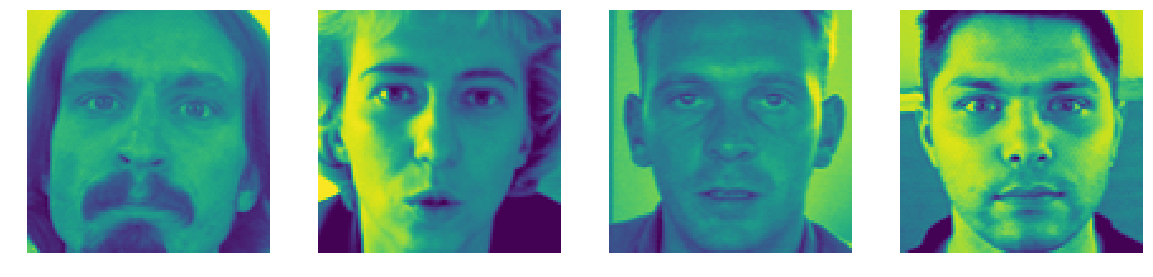

In [98]:
plt.figure(figsize=(20,5))
for i in range(0, 4):
    plt.subplot(1,4,i+1)
    img = df_train['Image'].iloc[i]
    plt.imshow(img)
    plt.axis('off')